In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.shape

(768, 9)

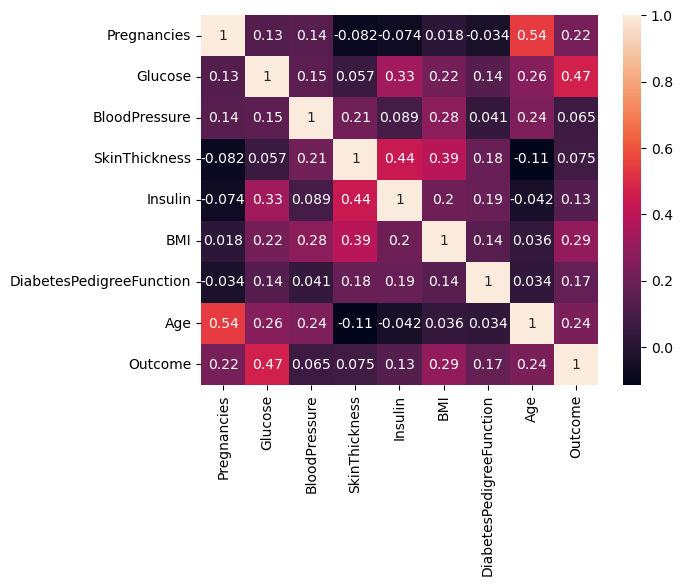

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [10]:
df["Insulin"].value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
178      1
127      1
510      1
16       1
112      1
Name: count, Length: 186, dtype: int64

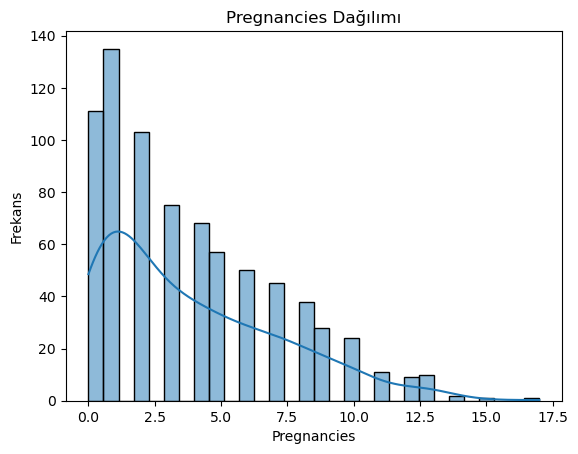

In [11]:
sns.histplot(df["Pregnancies"], bins=30, kde=True)
plt.title("Pregnancies Dağılımı")
plt.xlabel("Pregnancies")
plt.ylabel("Frekans")
plt.show()

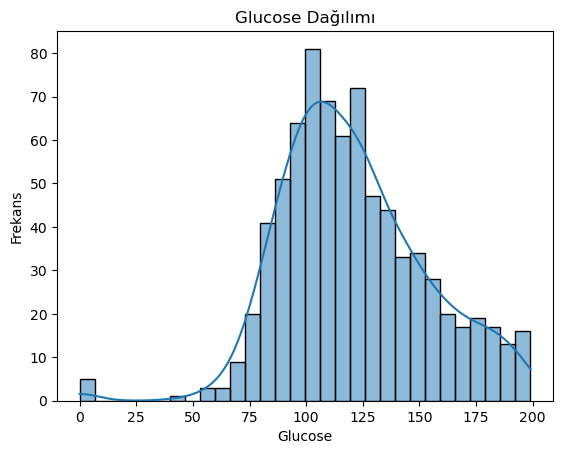

In [12]:
sns.histplot(df["Glucose"], bins=30, kde=True)
plt.title("Glucose Dağılımı")
plt.xlabel("Glucose")
plt.ylabel("Frekans")
plt.show()

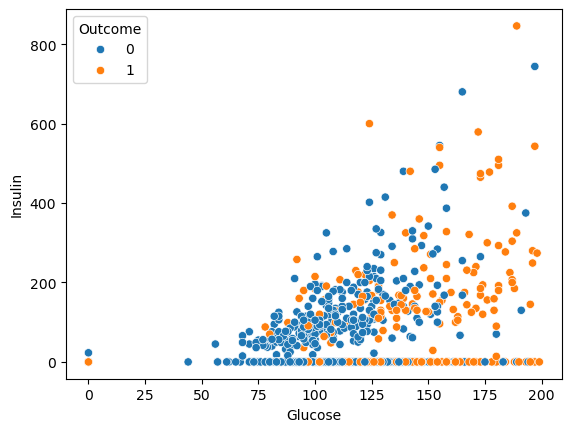

In [13]:
sns.scatterplot(x=df["Glucose"], y=df["Insulin"],hue=df["Outcome"])
plt.show()

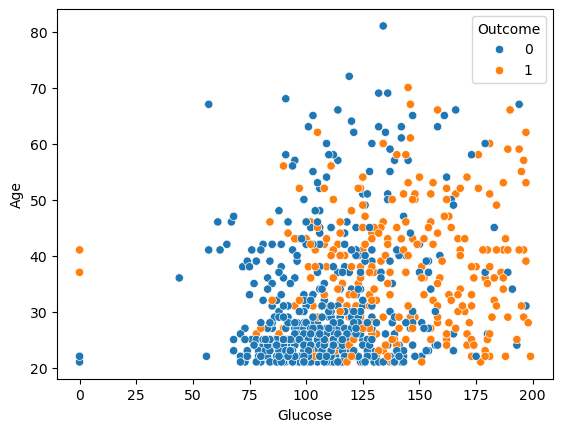

In [14]:
sns.scatterplot(x=df["Glucose"], y=df["Age"],hue=df["Outcome"])
plt.show()

In [15]:
# outlier tespiti

In [16]:
df.select_dtypes(include=["float", "int"]).columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
def remove_outliers_from_column(df, target_col, threshold=1.5, Q1=0.25, Q3=0.75):
    q1 = df[col].quantile(Q1)
    q3 = df[col].quantile(Q3)
    IQR = q3 - q1

    lower_bound = q1 - threshold * IQR
    upper_bound = q3 + threshold * IQR

    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [18]:
def find_outlier_iqr(df, threshold=1.5, Q1=0.25, Q3=0.75):
    outlier_summary = {}

    numeric_cols = df.select_dtypes(include=["float", "int"]).columns
    print(numeric_cols)

    for col in numeric_cols:
        q1 = df[col].quantile(Q1)
        q3 = df[col].quantile(Q3)
        IQR = Q3 - Q1

        lower_bound = q1 - threshold * IQR
        upper_bound = q3 + threshold * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = {
        "outlier_count" : outliers.shape[0],
        "outlier_percentage" : 100 * outliers.shape[0] / df.shape[0],
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
        }

    return pd.DataFrame(outlier_summary)

In [19]:
def remove_outliers_from_all_columns(df, threshold=1.5, Q1=0.25, Q3=0.75):
    df_clean = df.copy()
    numeric_cols = df_clean.select_dtypes(include=["float", "int"])

    for col in numeric_cols:
        q1 = df_clean[col].quantile(Q1)
        q3 = df_clean[col].quantile(Q3)
        IQR = q3 - q1

        lower_bound = q1 - threshold * IQR
        upper_bound = q3 + threshold * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean.copy()

In [20]:
df_all_clean = df_all_clean = remove_outliers_from_all_columns(df)

In [21]:
df_all_clean.shape

(636, 9)

In [22]:
df_all_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,3.786164,118.869497,72.007862,20.745283,69.017296,31.964151,0.426237,32.555031,0.309748
std,3.251388,28.996773,11.301102,15.231688,83.601857,6.384132,0.245088,10.879807,0.462754
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.238750,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,42.500000,32.000000,0.361000,29.000000,0.000000
75%,6.000000,136.250000,80.000000,32.000000,122.000000,36.000000,0.583000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,330.000000,49.600000,1.162000,65.000000,1.000000


In [23]:
# Train Test

In [24]:
X = df_all_clean.drop("Outcome", axis=1)
y = df_all_clean["Outcome"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [26]:
columns_to_fill = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [27]:
medians = {}

for col in columns_to_fill:
    medians_value = X_train[X_train[col] != 0][col].median()
    medians[col] = medians_value
    X_train[col] = X_train[col].replace(0, medians_value)

for col in columns_to_fill:
    X_test[col] = X_test[col].replace(0, medians[col])

In [28]:
medians

{'Glucose': 114.0,
 'BloodPressure': 72.0,
 'SkinThickness': 29.0,
 'Insulin': 120.0,
 'BMI': 32.0}

In [29]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,508.00000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,3.88189,118.779528,71.704724,28.870079,125.029528,32.038780,0.424565,32.710630
std,3.26445,28.664326,11.073692,8.105009,52.060891,6.413774,0.245648,10.872079
min,0.00000,44.000000,38.000000,7.000000,15.000000,18.200000,0.078000,21.000000
25%,1.00000,99.000000,64.000000,25.000000,119.000000,27.400000,0.237750,24.000000
50%,3.00000,114.000000,72.000000,29.000000,120.000000,32.000000,0.356000,29.000000
75%,6.00000,135.250000,78.500000,32.000000,120.000000,36.225000,0.573250,40.250000
max,13.00000,198.000000,106.000000,54.000000,328.000000,49.300000,1.162000,65.000000


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
def evaluate_model(true, predicted):
    acc = accuracy_score(true, predicted)
    cm = confusion_matrix(true, predicted)
    cr = classification_report(true, predicted)
    #print(f"Accuracy Score: ", acc)
    #print(f"Confusion Matrix: \n", cm)
    #print(f"Classification Report: \n", cr)

    return acc, cm, cr

In [38]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Naive Bayes" : GaussianNB(),
    "KNN" : KNeighborsClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Adaboost Classifier" : AdaBoostClassifier()
}

In [39]:
for i in range(len(list(models))):
    model =list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_acc, model_train_cm, model_train_cr = evaluate_model(y_train, y_train_pred)
    model_test_acc, model_test_cm, model_test_cr = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model Performance for Training Set")
    print("Accuracy Score: ", model_train_acc)
    print("Confusion Matrix: \n", model_train_cm)
    print("Classification Report: \n", model_train_cr)

    print("-" * 100)

    print("Model Performance for Test Set")
    print("Accuracy Score: ", model_test_acc)
    print("Confusion Matrix: \n", model_test_cm)
    print("Classification Report: \n", model_test_cr)
    print("-" * 100)
    print("\n")
    

Logistic Regression
Model Performance for Training Set
Accuracy Score:  0.7834645669291339
Confusion Matrix: 
 [[313  34]
 [ 76  85]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       347
           1       0.71      0.53      0.61       161

    accuracy                           0.78       508
   macro avg       0.76      0.71      0.73       508
weighted avg       0.78      0.78      0.77       508

----------------------------------------------------------------------------------------------------
Model Performance for Test Set
Accuracy Score:  0.7890625
Confusion Matrix: 
 [[79 13]
 [14 22]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85        92
           1       0.63      0.61      0.62        36

    accuracy                           0.79       128
   macro avg       0.74      0.73      0.74       128
weighted avg       